In [328]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import itertools

In [329]:
df = pd.read_csv("train.csv", index_col= 0)
display(df.head())

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [330]:
display(df.shape)

(1460, 80)

In [331]:
display(df.columns)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [332]:
columns_to_select = [
    'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
    'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 
    'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 
    'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
    'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd','MSSubClass', 'MSZoning', 'LotFrontage', 
    'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
    'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
    'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 
    'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual'
]

# Select columns
df_selected = df[columns_to_select]

In [333]:
display(df_selected.head(5))
display(df_selected.shape)

,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,...,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,...,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd
2,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,...,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA
3,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,...,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd
4,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,...,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA
5,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,...,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd


(1460, 54)

In [334]:
df_selected.columns

Index(['ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'MSSubClass', 'MSZoning', 'LotFrontage',
       'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual'],
      dtype='object')

# Fill in Misssing Values

In [335]:
# Missing values
missing_values = df_selected.isnull().sum()

# Duplicate rows
duplicates = df_selected.duplicated().sum()

display(missing_values)
display(duplicates)

ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
KitchenQual        0
TotRmsAbvGrd       0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley           1369
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle    

1

# We will deal with Duplicates Later

In [336]:
# Examine the Missing Values
df_with_nans = df_selected[df_selected.isna().any(axis=1)]
display(df_with_nans)

,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,...,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,...,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd
2,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,...,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA
3,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,...,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd
4,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,...,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA
5,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,...,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,...,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA
1457,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,...,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA
1458,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,...,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex


In [337]:
# House with no Basements are coded as Nan

# I replace this with "no basement" to avoid confusion

# Select all columns starting with 'Bsmt'
bsmt_columns = df_selected.columns[df_selected.columns.str.startswith('Bsmt')]

# Replace both NaN and <NA> with 'no basement'
df_selected.loc[:, bsmt_columns] = df_selected.loc[:, bsmt_columns].apply(lambda x: x.fillna('no basement').replace({np.nan: 'no basement'}))

#df_selected.loc[:, df_selected.columns.str.startswith('Bsmt')] = df_selected.loc[:, df_selected.columns.str.startswith('Bsmt')].fillna('no basement')

#df_selected.loc[:, df_selected.columns.str.startswith('Bsmt')] = df_selected.loc[:, df_selected.columns.str.startswith('Bsmt')].replace({np.nan: 'no basement'})



In [338]:
df_selected['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', 'no basement', 'Fa'], dtype=object)

In [339]:
missing_values = df_selected.isnull().sum()
display(missing_values)

ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
KitchenQual        0
TotRmsAbvGrd       0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley           1369
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle    

In [340]:
# NaN in the "Electrical" column

pd.set_option('display.max_columns', 27)
missing_electrical = df_selected[df_selected['Electrical'].isna()]
display(missing_electrical)

,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,...,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,
1380,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,...,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA


In [341]:
# There is one missing value in Electricity
# Instead of just finding the mode of the electricity variable, I take the mode
# of Electricity for all of the houses that have similar characteristics in terms of
# Central Air, Heating, and Heating QC.

filtered_data = df_selected[(df_selected['CentralAir'] == 'Y') & 
                            (df_selected['Heating'] == 'GasA') & 
                            (df_selected['HeatingQC'] == 'Gd')]

# Mode
mode_electrical = filtered_data['Electrical'].mode()
display(filtered_data.head())

# Display the mode(s)
display(mode_electrical)

# replace the one missing value with the associated mode from above
df_selected.loc[:, 'Electrical'] = df_selected['Electrical'].fillna('SBrkr')

,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,...,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,...,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA
9,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,...,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,NaN,0.0,TA
32,TA,CBlock,TA,TA,No,Unf,0,Unf,0,1228,1228,GasA,Gd,...,1Fam,1Story,5,6,1966,2006,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,TA
34,TA,CBlock,TA,TA,No,Rec,1018,Unf,0,380,1398,GasA,Gd,...,1Fam,1Story,5,5,1959,1959,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,TA
38,TA,CBlock,TA,TA,No,Rec,1213,Unf,0,84,1297,GasA,Gd,...,1Fam,1Story,5,6,1954,1990,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,650.0,TA


0    SBrkr
Name: Electrical, dtype: object

In [342]:
# LotFrontage

print(df_selected['LotFrontage'].unique())
print(df_selected['LotFrontage'].value_counts())
print(df_selected['LotFrontage'].info())

# We presume that Missing values indicate ZERO LotFrontage
df_selected.loc[:, 'LotFrontage'] = df_selected['LotFrontage'].fillna(0.00)


[ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
LotFrontage
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: count, Length: 110, dtype: int64
<class 'pandas.core.series.Series'>
Index: 1460 entries, 1 to 1460
Series name: LotFrontage
Non-Null Count  Dtype  
--------------  -----  
1201 non-null   float64
dtypes: float64(1)
memory usage: 22.8 KB
None


In [343]:
missing_values = df_selected.isnull().sum()
display(missing_values)

ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
KitchenQual        0
TotRmsAbvGrd       0
MSSubClass         0
MSZoning           0
LotFrontage        0
LotArea            0
Street             0
Alley           1369
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle    

In [344]:
# Alley

print(df_selected['Alley'].unique())
print(df_selected['Alley'].value_counts())
print(df_selected['Alley'].info())

# Codebook indicates Missing Values (Na) equal 'no alley access'
df_selected.loc[:, 'Alley'] = df_selected['Alley'].fillna('None')

[nan 'Grvl' 'Pave']
Alley
Grvl    50
Pave    41
Name: count, dtype: int64
<class 'pandas.core.series.Series'>
Index: 1460 entries, 1 to 1460
Series name: Alley
Non-Null Count  Dtype 
--------------  ----- 
91 non-null     object
dtypes: object(1)
memory usage: 22.8+ KB
None


In [345]:
#Masonry Veneer Type 

print(df_selected['MasVnrType'].unique())
print(df_selected['MasVnrType'].value_counts())
print(df_selected['MasVnrType'].info())

# According to the codebook, missing values indicate ZERO Masonry veneer
df_selected.loc[:, 'MasVnrType'] = df_selected['MasVnrType'].fillna('None')

['BrkFace' nan 'Stone' 'BrkCmn']
MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64
<class 'pandas.core.series.Series'>
Index: 1460 entries, 1 to 1460
Series name: MasVnrType
Non-Null Count  Dtype 
--------------  ----- 
588 non-null    object
dtypes: object(1)
memory usage: 22.8+ KB
None


In [346]:
# Masonray Area

print(df_selected['MasVnrArea'].unique())
print(df_selected['MasVnrArea'].value_counts())
print(df_selected['MasVnrArea'].info())

# We presume that missing values indicate ZERO Masonry area
df_selected.loc[:, 'MasVnrArea'] = df_selected['MasVnrArea'].fillna(0.00).round(4)
#print(df_selected['MasVnrArea'].unique())

[1.960e+02 0.000e+00 1.620e+02 3.500e+02 1.860e+02 2.400e+02 2.860e+02
 3.060e+02 2.120e+02 1.800e+02 3.800e+02 2.810e+02 6.400e+02 2.000e+02
 2.460e+02 1.320e+02 6.500e+02 1.010e+02 4.120e+02 2.720e+02 4.560e+02
 1.031e+03 1.780e+02 5.730e+02 3.440e+02 2.870e+02 1.670e+02 1.115e+03
 4.000e+01 1.040e+02 5.760e+02 4.430e+02 4.680e+02 6.600e+01 2.200e+01
 2.840e+02 7.600e+01 2.030e+02 6.800e+01 1.830e+02 4.800e+01 2.800e+01
 3.360e+02 6.000e+02 7.680e+02 4.800e+02 2.200e+02 1.840e+02 1.129e+03
 1.160e+02 1.350e+02 2.660e+02 8.500e+01 3.090e+02 1.360e+02 2.880e+02
 7.000e+01 3.200e+02 5.000e+01 1.200e+02 4.360e+02 2.520e+02 8.400e+01
 6.640e+02 2.260e+02 3.000e+02 6.530e+02 1.120e+02 4.910e+02 2.680e+02
 7.480e+02 9.800e+01 2.750e+02 1.380e+02 2.050e+02 2.620e+02 1.280e+02
 2.600e+02 1.530e+02 6.400e+01 3.120e+02 1.600e+01 9.220e+02 1.420e+02
 2.900e+02 1.270e+02 5.060e+02 2.970e+02       nan 6.040e+02 2.540e+02
 3.600e+01 1.020e+02 4.720e+02 4.810e+02 1.080e+02 3.020e+02 1.720e+02
 3.990

In [347]:
print(df_selected['LotShape'].unique()) 
print(df_selected['LotShape'].value_counts()) 
print(df_selected['LotShape'].info()) 


['Reg' 'IR1' 'IR2' 'IR3']
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64
<class 'pandas.core.series.Series'>
Index: 1460 entries, 1 to 1460
Series name: LotShape
Non-Null Count  Dtype 
--------------  ----- 
1460 non-null   object
dtypes: object(1)
memory usage: 22.8+ KB
None


In [348]:
missing_values = df_selected.isnull().sum()
display(missing_values)

## No more Missing values

ExterCond       0
Foundation      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
Heating         0
HeatingQC       0
CentralAir      0
Electrical      0
1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
GrLivArea       0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
KitchenQual     0
TotRmsAbvGrd    0
MSSubClass      0
MSZoning        0
LotFrontage     0
LotArea         0
Street          0
Alley           0
LotShape        0
LandContour     0
Utilities       0
LotConfig       0
LandSlope       0
Neighborhood    0
Condition1      0
Condition2      0
BldgType        0
HouseStyle      0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
RoofStyle       0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
MasVnrArea      0
ExterQual       0
dtype: int64

In [349]:
display(df_selected.head(10))
df_selected.info()

,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,...,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,...,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd
2,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,...,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA
3,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,...,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd
4,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,...,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA
5,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,...,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd
6,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,...,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA
7,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,...,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd
8,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,...,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA
9,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,...,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA


<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 54 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ExterCond     1460 non-null   object 
 1   Foundation    1460 non-null   object 
 2   BsmtQual      1460 non-null   object 
 3   BsmtCond      1460 non-null   object 
 4   BsmtExposure  1460 non-null   object 
 5   BsmtFinType1  1460 non-null   object 
 6   BsmtFinSF1    1460 non-null   int64  
 7   BsmtFinType2  1460 non-null   object 
 8   BsmtFinSF2    1460 non-null   int64  
 9   BsmtUnfSF     1460 non-null   int64  
 10  TotalBsmtSF   1460 non-null   int64  
 11  Heating       1460 non-null   object 
 12  HeatingQC     1460 non-null   object 
 13  CentralAir    1460 non-null   object 
 14  Electrical    1460 non-null   object 
 15  1stFlrSF      1460 non-null   int64  
 16  2ndFlrSF      1460 non-null   int64  
 17  LowQualFinSF  1460 non-null   int64  
 18  GrLivArea     1460 non-null   int

# Above has replaced the missing values and Identified potential duplicates

# Convert Categorical and Ordinal Variables to Numeric

## Create Lists of Categorical, Ordinal, and Numeric Variables'

In [350]:
cat_vars = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 
            'Condition1', 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
            'MasVnrType', 'Foundation', 'Heating', 'Electrical']

ordinal_vars = ['LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond', 'BsmtQual', 
                'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
                'CentralAir', 'KitchenQual']                

numeric_vars = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 
                'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 
                'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'OverallQual', 'OveralCOnd', 'TotRmsAbvGrd']


In [351]:
df_cat_vars = pd.DataFrame(df_selected[['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 
            'Condition1', 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
            'MasVnrType', 'Foundation', 'Heating', 'Electrical']])

df_ordinal_vars = pd.DataFrame(df_selected[['LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond', 'BsmtQual', 
                'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
                'CentralAir', 'KitchenQual']])              

df_numeric_vars = pd.DataFrame(df_selected[['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 
                'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 
                'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'OverallQual', 'OverallCond', 'TotRmsAbvGrd']])

In [352]:
# Categorical variables
display(df_cat_vars.describe().round(2))
display(df_cat_vars.value_counts().reset_index())

,MSSubClass
count,1460.0
mean,56.9
std,42.3
min,20.0
25%,20.0
50%,50.0
75%,70.0
max,190.0


,MSSubClass,MSZoning,Street,Alley,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,Electrical,count
0,60,RL,Pave,None,Lvl,Inside,Gilbert,Norm,Norm,1Fam,Gable,CompShg,VinylSd,VinylSd,None,PConc,GasA,SBrkr,22
1,20,RL,Pave,None,Lvl,Inside,CollgCr,Norm,Norm,1Fam,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,SBrkr,18
2,60,RL,Pave,None,Lvl,Inside,CollgCr,Norm,Norm,1Fam,Gable,CompShg,VinylSd,VinylSd,None,PConc,GasA,SBrkr,17
3,20,RL,Pave,None,Lvl,Inside,CollgCr,Norm,Norm,1Fam,Gable,CompShg,VinylSd,VinylSd,None,PConc,GasA,SBrkr,17
4,60,RL,Pave,None,Lvl,Inside,CollgCr,Norm,Norm,1Fam,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,SBrkr,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057,30,RM,Pave,Grvl,Lvl,Inside,OldTown,Norm,Norm,1Fam,Mansard,CompShg,VinylSd,VinylSd,None,BrkTil,GasA,SBrkr,1
1058,30,RM,Pave,None,Bnk,Inside,IDOTRR,Norm,Norm,1Fam,Gable,CompShg,BrkFace,BrkFace,None,BrkTil,GasA,FuseA,1
1059,30,RM,Pave,None,Bnk,Inside,OldTown,Norm,Norm,1Fam,Hip,CompShg,Stucco,Stucco,BrkCmn,BrkTil,GasA,SBrkr,1
1060,30,RM,Pave,None,Lvl,Corner,BrkSide,Norm,Norm,1Fam,Gable,CompShg,Wd Sdng,Wd Sdng,None,BrkTil,GasA,FuseA,1


In [353]:
# Ordinal Variables
display(df_ordinal_vars.describe().round(2))

,LotShape,Utilities,LandSlope,HouseStyle,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,4,2,3,8,4,5,5,5,5,7,7,5,2,4
top,Reg,AllPub,Gtl,1Story,TA,TA,TA,TA,No,Unf,Unf,Ex,Y,TA
freq,925,1459,1382,726,906,1282,649,1311,953,430,1256,741,1365,735


In [354]:
# Numric variables
display(df_numeric_vars.describe().round(2))

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,OverallQual,OverallCond,TotRmsAbvGrd
count,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00
mean,57.62,10516.83,1971.27,1984.87,103.12,443.64,46.55,567.24,1057.43,1162.63,346.99,5.84,1515.46,0.43,0.06,1.57,0.38,2.87,1.05,6.10,5.58,6.52
std,34.66,9981.26,30.20,20.65,180.73,456.10,161.32,441.87,438.71,386.59,436.53,48.62,525.48,0.52,0.24,0.55,0.50,0.82,0.22,1.38,1.11,1.63
min,0.00,1300.00,1872.00,1950.00,0.00,0.00,0.00,0.00,0.00,334.00,0.00,0.00,334.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,2.00
25%,42.00,7553.50,1954.00,1967.00,0.00,0.00,0.00,223.00,795.75,882.00,0.00,0.00,1129.50,0.00,0.00,1.00,0.00,2.00,1.00,5.00,5.00,5.00
50%,63.00,9478.50,1973.00,1994.00,0.00,383.50,0.00,477.50,991.50,1087.00,0.00,0.00,1464.00,0.00,0.00,2.00,0.00,3.00,1.00,6.00,5.00,6.00
75%,79.00,11601.50,2000.00,2004.00,164.25,712.25,0.00,808.00,1298.25,1391.25,728.00,0.00,1776.75,1.00,0.00,2.00,1.00,3.00,1.00,7.00,6.00,7.00
max,313.00,215245.00,2010.00,2010.00,1600.00,5644.00,1474.00,2336.00,6110.00,4692.00,2065.00,572.00,5642.00,3.00,2.00,3.00,2.00,8.00,3.00,10.00,9.00,14.00


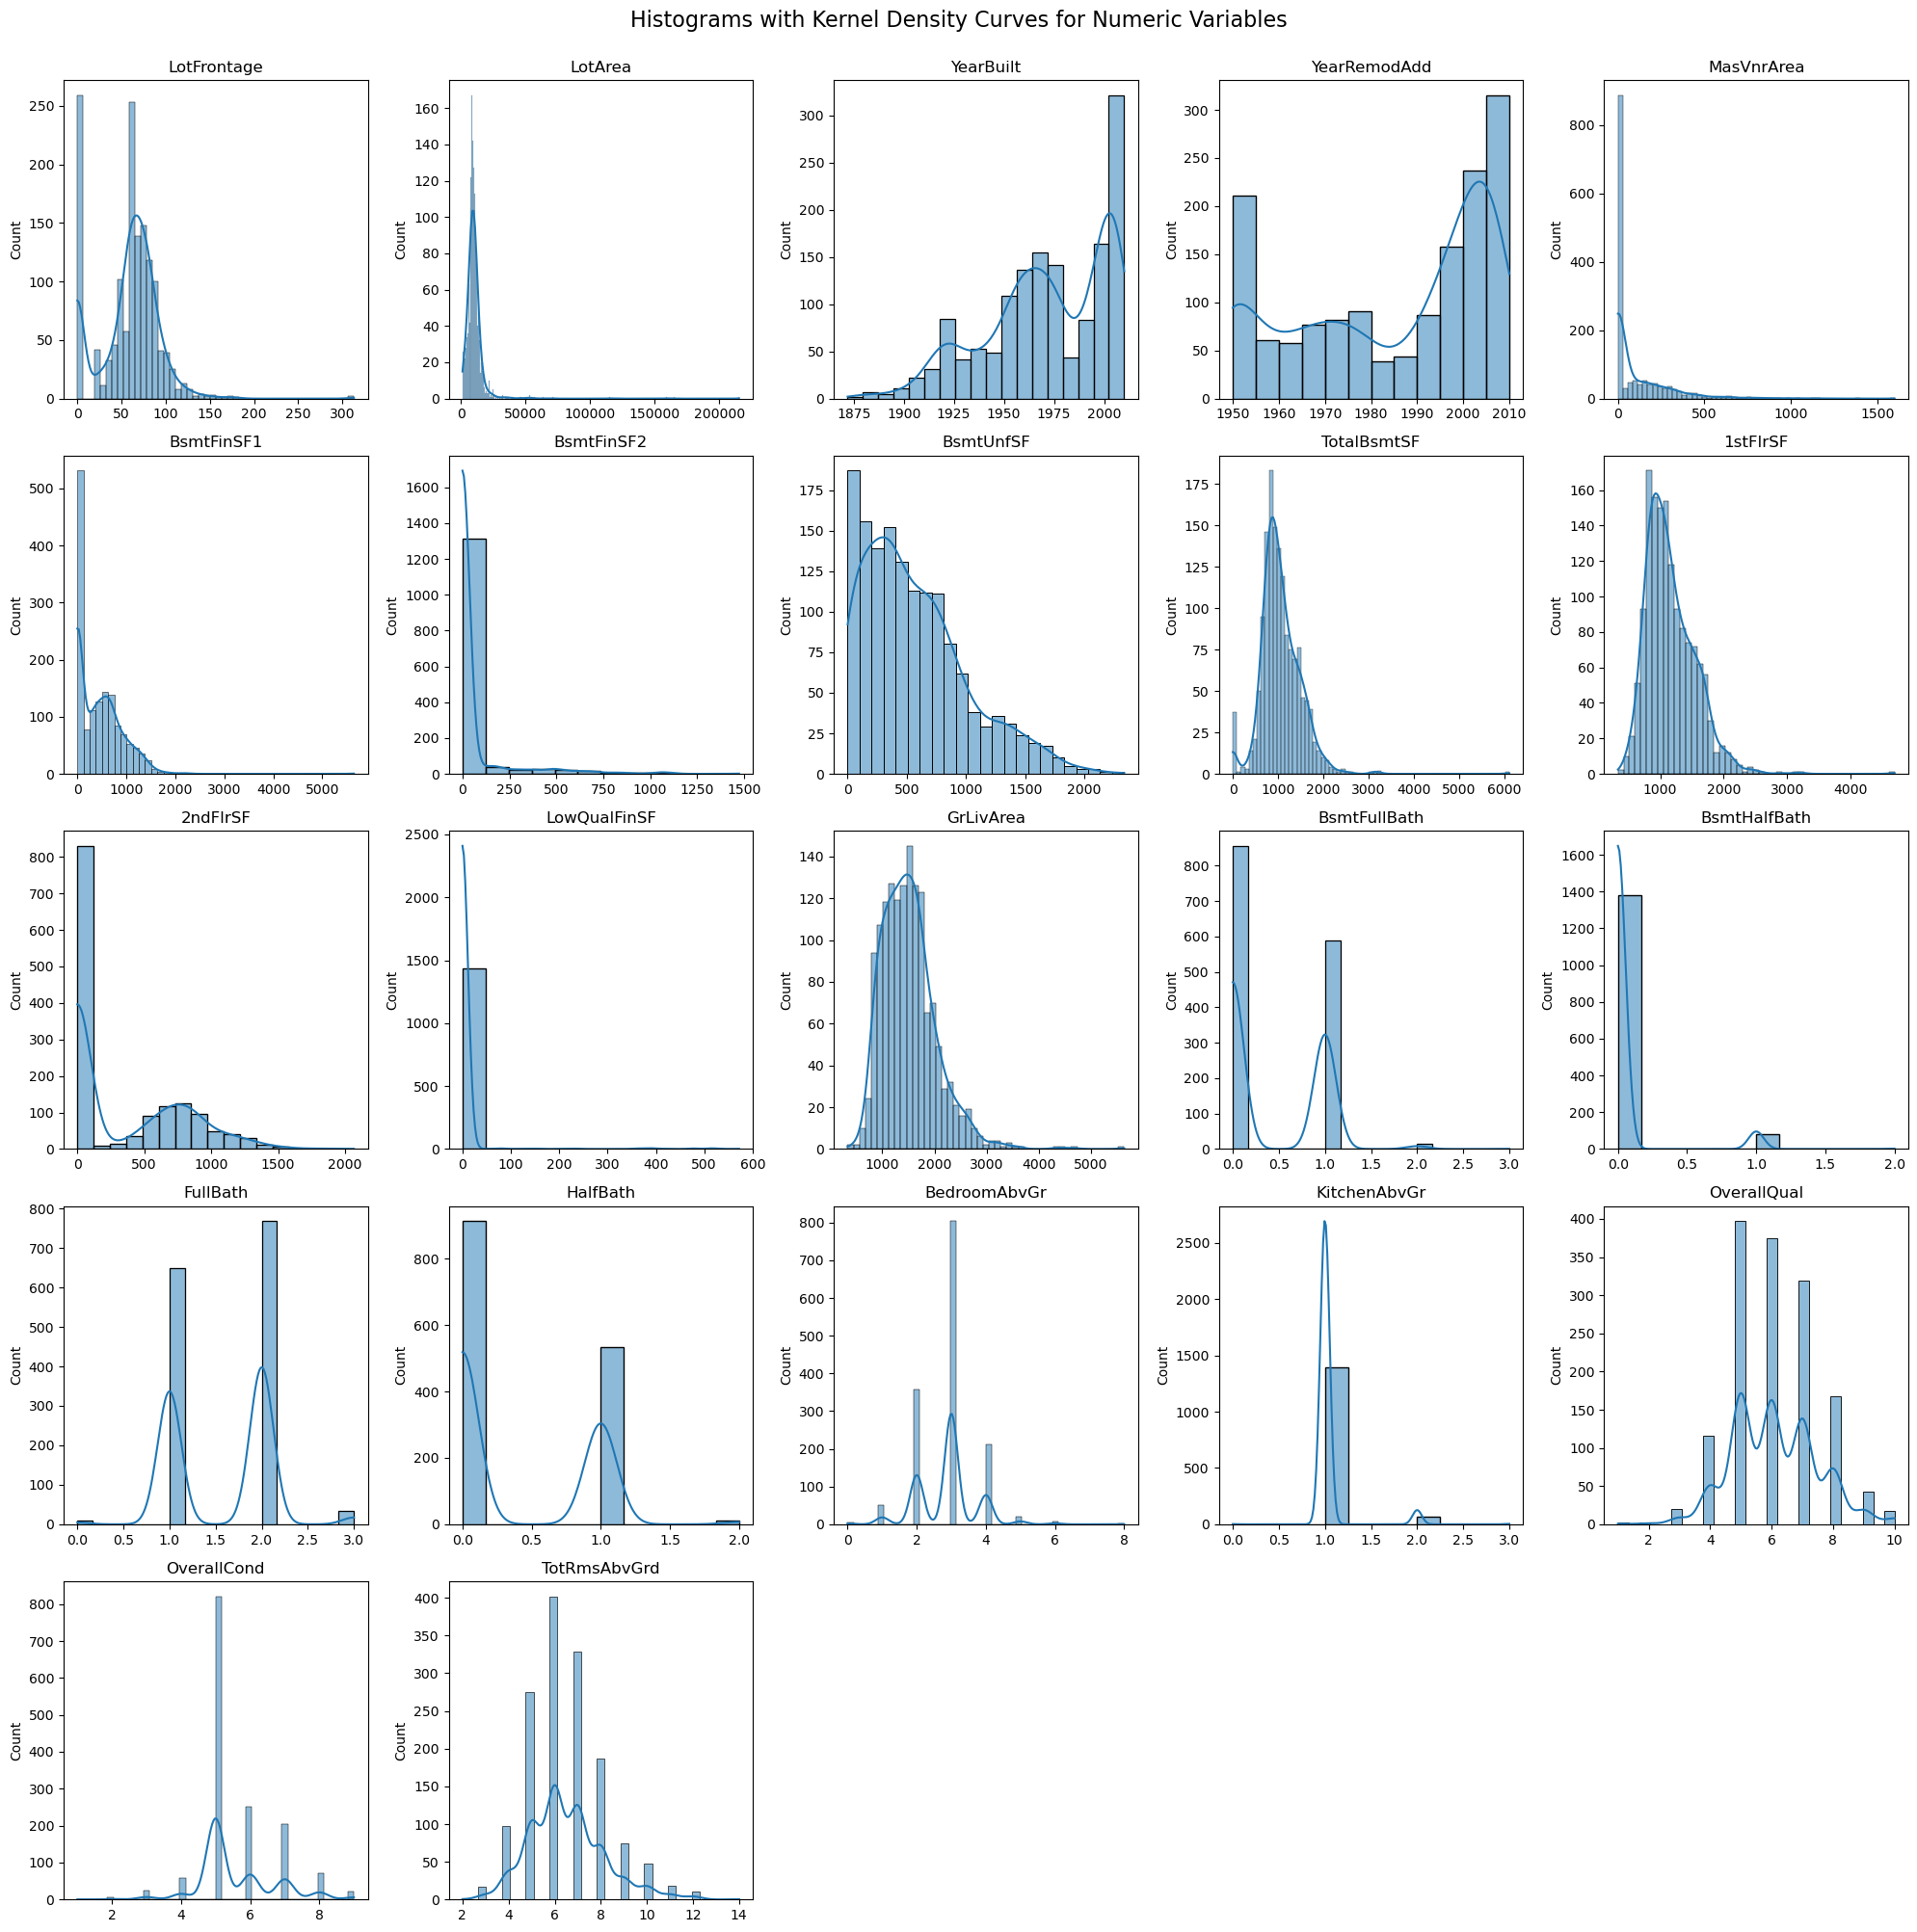

In [355]:
fig, axes = plt.subplots(5, 5, figsize=(20, 20))
fig.suptitle('Histograms with Kernel Density Curves for Numeric Variables', fontsize=16, y=1.0)

plt.subplots_adjust(top=1.0, hspace=1.0, wspace=0.3)
axes = axes.flatten()

for i, column in enumerate(df_numeric_vars.columns):
    if i < 25:  
        sns.histplot(df_numeric_vars[column], kde=True, ax=axes[i])
        axes[i].set_title(column)
        axes[i].set_xlabel('')

for i in range(len(df_numeric_vars.columns), 25):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

## Create dictionary of variable codings

In [356]:
var_dict = {
    'LotShape': ['IR3', 'IR2', 'IR1', 'Reg'], 	
    'Utilities': ['ELO', 'NoSeWa', 'NoSewe', 'AllPub'],
    'LandSlope': ['Sev', 'Mod', 'Gtl'],
    #'HouseStyle': [] will be done manually outside of the function#
    'ExterQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'ExterCond': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtQual': ['no basement', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtCond': ['no basement', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtExposure': ['no basement', 'No', 'Mn', 'Av', 'Gd'],
    'BsmtFinType1': ['no basement', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    'BsmtFinType2': ['no basement', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    'HeatingQC': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'CentralAir': ['N', 'Y'],
    'KitchenQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex']
}


In [357]:
df_selected = df_selected.copy()

# Define binary variables
binary_vars = ['CentralAir']

def create_mapping(categories, variable):
    mapping = {}
    
    # Handle binary variables
    if variable in binary_vars:
        mapping = {'N': 0, 'Y': 1}
        return mapping
    
    # Handle ordinal variables
    start_idx = 0
    if categories[0] == 'no basement':
        mapping['no basement'] = 0
        start_idx = 1
    
    for i, category in enumerate(categories[start_idx:], start=1):
        mapping[category] = i
        
    return mapping

# Create all mappings and apply them to the dataframe
for variable, categories in var_dict.items():
    # Create mapping for this variable
    mapping = create_mapping(categories, variable)

    # Apply mapping using .map()
    df_selected[variable] = df_selected[variable].map(mapping)

    # Convert to int64
    df_selected[variable] = df_selected[variable].astype('int64')
    
    # Print results for verification
    print(f"\nProcessed {variable}:")
    print("Mapping:", mapping)
    print("Unique values in DataFrame:", df_selected[variable].unique())
    print(df_selected.shape)	


Processed LotShape:
Mapping: {'IR3': 1, 'IR2': 2, 'IR1': 3, 'Reg': 4}
Unique values in DataFrame: [4 3 2 1]
(1460, 54)

Processed Utilities:
Mapping: {'ELO': 1, 'NoSeWa': 2, 'NoSewe': 3, 'AllPub': 4}
Unique values in DataFrame: [4 2]
(1460, 54)

Processed LandSlope:
Mapping: {'Sev': 1, 'Mod': 2, 'Gtl': 3}
Unique values in DataFrame: [3 2 1]
(1460, 54)

Processed ExterQual:
Mapping: {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
Unique values in DataFrame: [4 3 5 2]
(1460, 54)

Processed ExterCond:
Mapping: {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
Unique values in DataFrame: [3 4 2 1 5]
(1460, 54)

Processed BsmtQual:
Mapping: {'no basement': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
Unique values in DataFrame: [4 3 5 0 2]
(1460, 54)

Processed BsmtCond:
Mapping: {'no basement': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
Unique values in DataFrame: [3 4 0 2 1]
(1460, 54)

Processed BsmtExposure:
Mapping: {'no basement': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}
Unique value

In [358]:
# HouseStyle: Style of dwelling

print(df_selected['HouseStyle'].unique()) 
print(df_selected['HouseStyle'].value_counts()) 

# Map
HouseStyle_map = {
       '1Story': 100, #	One story
       '1.5Fin': 160, #	One and one-half story: 2nd level finished
       '1.5Unf': 150, #	One and one-half story: 2nd level unfinished
       '2Story': 200, #	Two story
       '2.5Fin': 260, #	Two and one-half story: 2nd level finished
       '2.5Unf': 250, #	Two and one-half story: 2nd level unfinished
       'SFoyer': 230, #	Split Foyer
       'SLvl':	 240, # Split Level
}

df_selected.loc[:, 'HouseStyle'] = df_selected['HouseStyle'].map(HouseStyle_map)

# Convert to Int64
df_selected = df_selected.copy()
df_selected['HouseStyle'] = df_selected['HouseStyle'].astype('int64')

# Check
print("Final unique values:", df_selected['HouseStyle'].unique())
print("Final unique counts:", df_selected['HouseStyle'].value_counts())
print(df_selected.shape)	
       

['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
HouseStyle
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: count, dtype: int64
Final unique values: [200 100 160 150 230 240 250 260]
Final unique counts: HouseStyle
100    726
200    445
160    154
240     65
230     37
150     14
250     11
260      8
Name: count, dtype: int64
(1460, 54)


# Encode Categorical Variables Using the One Hot Encoder

In [359]:
# Create and fit the encoder
encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='error')
encoded_cats = encoder.fit_transform(df_selected[cat_vars])

# Get feature names and create DataFrame with boolean type
feature_names = encoder.get_feature_names_out(cat_vars)
encoded_df = pd.DataFrame(encoded_cats, columns=feature_names, index=df.index).astype(bool)

# Drop original categorical columns and merge with encoded ones
df_selected = df_selected.drop(columns=cat_vars)
df_final = pd.concat([df_selected, encoded_df], axis=1)

#change CentraAir to boolean
df_final['CentralAir'] = df_final['CentralAir'].astype(bool)

# Verification prints
print("Original df_selected shape:", df_selected.shape)
print("encoded_df shape:", encoded_df.shape)
print("Final merged df shape:", df_final.shape)
print("\nColumn types in final dataframe:")
print(df_final.dtypes.value_counts())

Original df_selected shape: (1460, 36)
encoded_df shape: (1460, 129)
Final merged df shape: (1460, 165)

Column types in final dataframe:
bool       130
int64       33
float64      2
Name: count, dtype: int64


In [360]:
missing_values = df_final.isnull().sum()
display(missing_values)

display(df_final.info())

ExterCond           0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
                   ..
Heating_Wall        0
Electrical_FuseF    0
Electrical_FuseP    0
Electrical_Mix      0
Electrical_SBrkr    0
Length: 165, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Columns: 165 entries, ExterCond to Electrical_SBrkr
dtypes: bool(130), float64(2), int64(33)
memory usage: 596.0 KB


None

# No Missing Values, All Numeric variables


# Git Code

In [363]:
!git status

On branch Data_Inspection_Vars_28_54
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   Data_Inspection_Vars_28_54.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	Data_Inspection_Vars_1_54.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [32]:
#!git add Data_Inspection_Vars_28_54.ipynb

In [33]:
#!git commit -m "Updated FORMULAS for data inspection notebook with changes to variables 28-54"

[Data_Inspection_Vars_28_54 7da65ab] Updated FORMULAS for data inspection notebook with changes to variables 28-54
 1 file changed, 43 insertions(+), 4279 deletions(-)


In [34]:
#!git push origin Data_Inspection_Vars_28_54

To https://github.com/AaronMartin78/Kaggle-Competition-Housing-Prices-I
   45cb62e..7da65ab  Data_Inspection_Vars_28_54 -> Data_Inspection_Vars_28_54
